In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

### Податоци

In [2]:
data = pd.read_csv("../data/data.csv")
data = data.drop(["Unnamed: 0","Manufacturer"],axis=1)
print("Number of records = " + str(data.shape[0]))
print("Number of features = " + str(data.shape[1]))
data.head()

Number of records = 378
Number of features = 72


,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi,logPrice
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,0,0,0,1,0,0,0,0,0,10.085392
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.221905
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,9.897972
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.645401
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.064671


In [3]:
data.describe()

,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi,logPrice
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,...,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,3839.119048,6.132751,0.978836,89.968254,0.984127,0.817460,0.825397,0.119048,0.248677,1.939153,...,0.005291,0.034392,0.013228,0.068783,0.129630,0.156085,0.010582,0.182540,0.222222,9.660766
std,730.000661,0.441658,0.144122,88.120601,0.125150,0.386801,0.380130,0.324274,0.432819,0.239365,...,0.072643,0.182474,0.114399,0.253420,0.336341,0.363417,0.102459,0.386801,0.416291,0.738215
min,1715.000000,4.600000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.515191
25%,3370.000000,6.000000,1.000000,32.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.121509
50%,4000.000000,6.260000,1.000000,64.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.512148
75%,4230.000000,6.390000,1.000000,128.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.042815
max,6000.000000,6.780000,1.000000,512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.013695


In [4]:
boolean_columns = ['Touchscreen', 'Headphones','Face unlock', 'Fingerprint sensor', 'Wireless charging',
       'NFC', '4G/ LTE', '5G','3G', 'EDGE', 'GPRS', 'Wi-Fi', 'VoLTE', 'Bluetooth', 'GPS', 'FM Radio', 'Fast Charging', 'Removable Battery',
       'Card Slot', 'Light Sensor', 'Compass Sensor', 'Proximity Sensor', 'Magnetic Sensor',
       'Gravity Sensor', 'Heathtracking Sensor', 'Gyroscope Sensor', 'Accelerometar Sensor',
       'Vibration Sensor', 'Laser Sensor']
categorical_columns = ['SIM Type', 'Usb Type', 'OS', 'cpuCores', 'Chipset', 'Flash','Launched_Month', 'Launched_Year']
numerical_columns = ['Battery capacity', 'Screen Size', 'Internal storage','Number of SIMs','Expandable storage', 'Price'
                    ,'CPU', 'RAM', 'Rear Camera', 'Front Camera','PPI','Width', 'Height', 'Weight','Number of Rear Cameras','Resolution_x', 
                     'Resolution_y','logPrice']
brand_columns = ['Brand__Coolpad', 'Brand__Google', 
       'Brand__Huawei', 'Brand__Infinix', 'Brand__LG', 'Brand__Lenovo',
       'Brand__Micromax', 'Brand__Motorola', 'Brand__Nokia', 'Brand__OnePlus',
       'Brand__Oppo',  'Brand__Realme', 'Brand__Samsung',
       'Brand__Tecno', 'Brand__Vivo', 'Brand__Xiaomi','Brand__Apple']

## Отстранување на outlierи

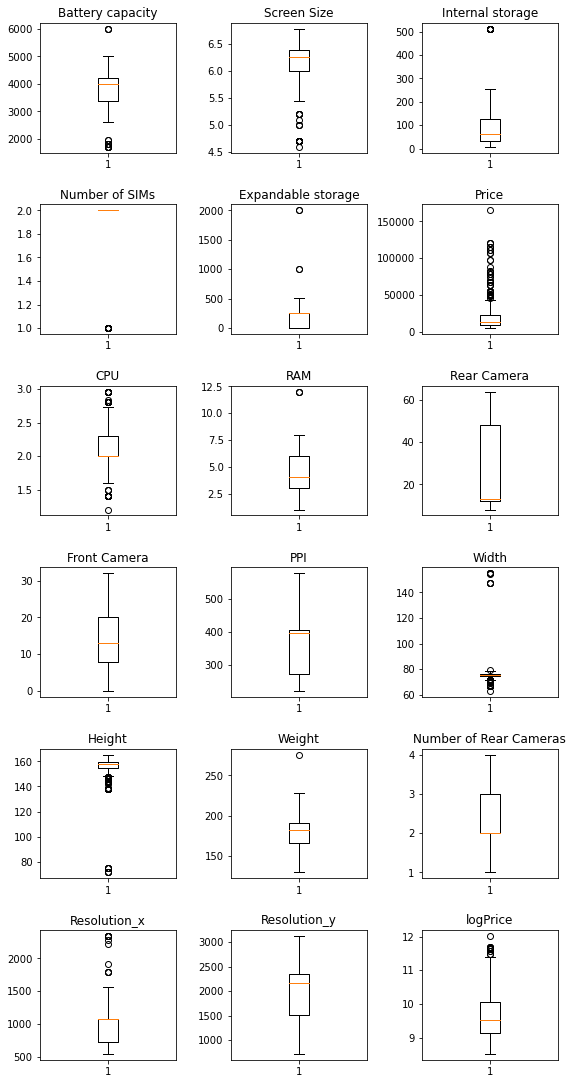

In [5]:
plt.figure(figsize=(9,18))
for i in range(1,len(numerical_columns)+1):
    ax=plt.subplot(6, 3, i)
    ax.boxplot(data[numerical_columns[i-1]])
    ax.set_title(numerical_columns[i-1])

plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

In [6]:
for column in numerical_columns:
    data[(np.abs(stats.zscore(data[column])) < 3)].all(axis=1)  #proveri kod
    
print("Number of records after removing outliers = " + str(data.shape[0]))


Number of records after removing outliers = 378


Напиши фенси дека немаме outlierи

## Визуелизации

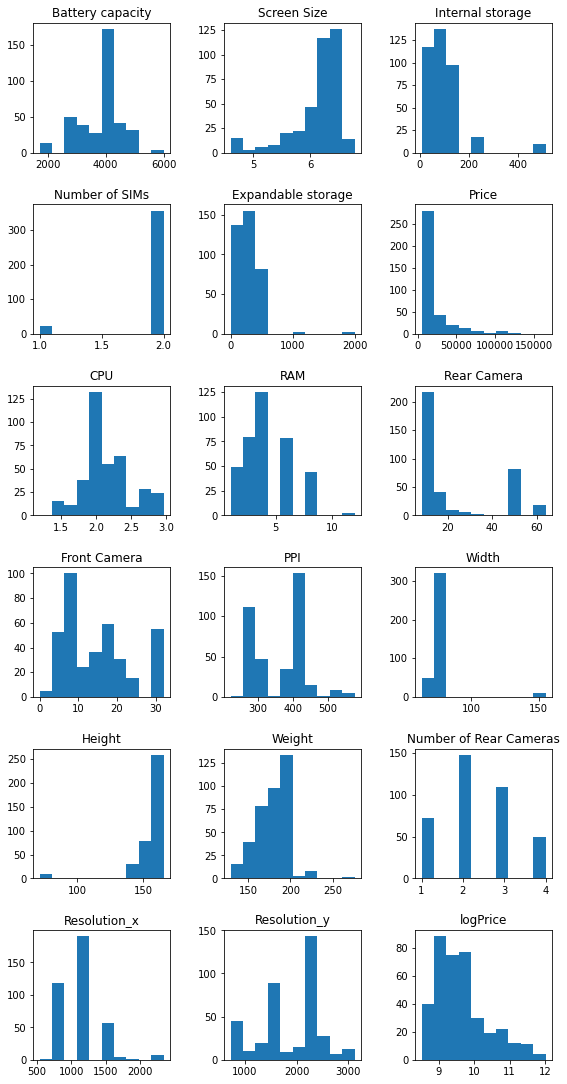

In [7]:
plt.figure(figsize=(9,18))
for i in range(1,len(numerical_columns)+1):
    ax=plt.subplot(6, 3, i)
    ax.hist(data[numerical_columns[i-1]])
    ax.set_title(numerical_columns[i-1])
    
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

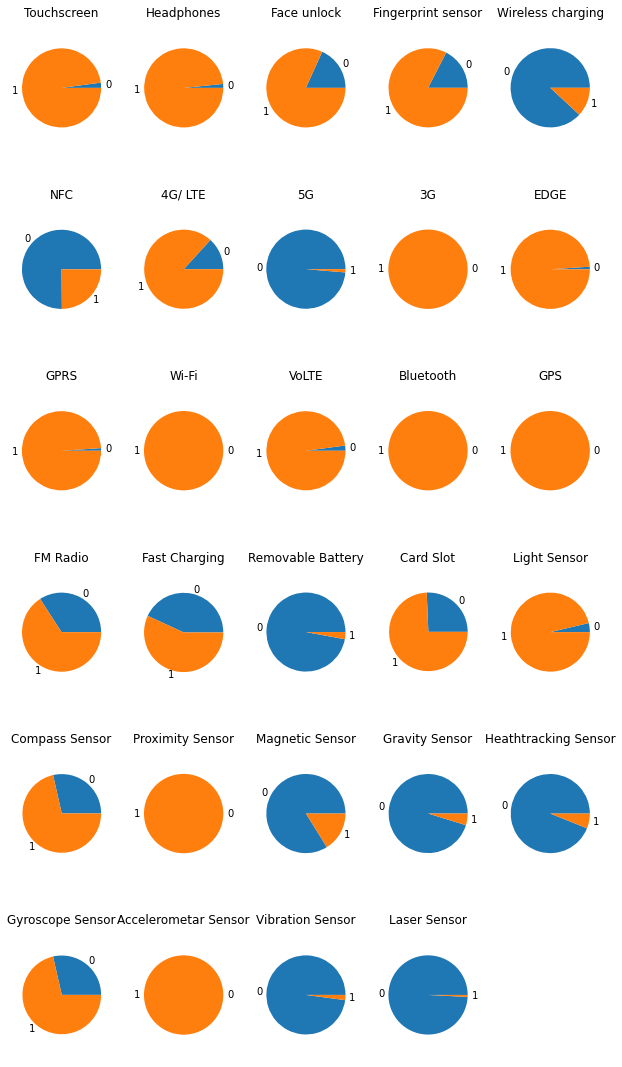

In [8]:
plt.figure(figsize=(10,18))
for i in range(1,len(boolean_columns)+1):
    n = len(data[boolean_columns[i-1]])
    n_1 = sum(data[boolean_columns[i-1]].tolist())
    ax=plt.subplot(6, 5, i)
    patches, texts = ax.pie([n-n_1,n_1],labels=[0,1])
    ax.axis('equal')
    ax.set_title(boolean_columns[i-1])
     
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

Од некои не добиваме никакви информации затоа што сите се сите иста вредност. Имаме и мн со над 90% иста вредност но сега за сега ќе ги оставиме па во процесот на избирање на features за моделите ќе се справиме со нив

In [9]:
to_remove = ['3G', 'Wi-Fi', 'Bluetooth', 'GPS', 'Proximity Sensor', 'Accelerometar Sensor']
data = data.drop(to_remove,axis=1)
for column in to_remove:
    boolean_columns.remove(column)
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 6 features
Updated number of features = 66


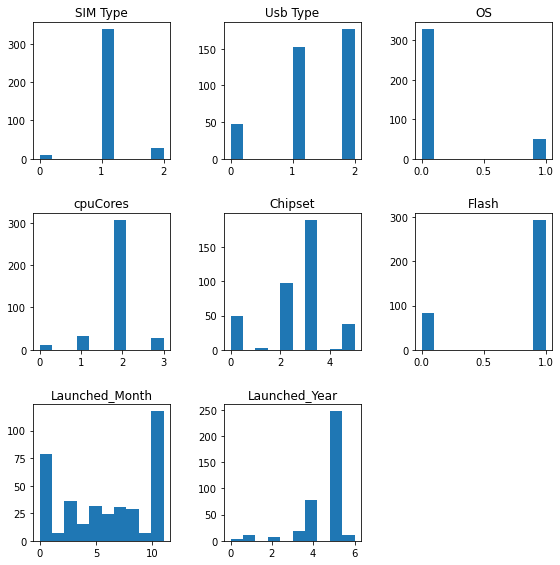

In [10]:
plt.figure(figsize=(9,9))
for i in range(1,len(categorical_columns)+1):
    ax=plt.subplot(3, 3, i)
    ax.hist(data[categorical_columns[i-1]])
    ax.set_title(categorical_columns[i-1])
    
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

In [11]:
correlated_columns = set()
for i in range(len(data.columns)):
    for j in range(i+1,len(data.columns)):
        correlation = data[data.columns[i]].corr(data[data.columns[j]]) 
        if correlation > 0.6:
            correlated_columns.add(data.columns[i])
            correlated_columns.add(data.columns[j])
correlated_columns = list(correlated_columns)

Text(0.5, 1.0, 'Correlation Heatmap')

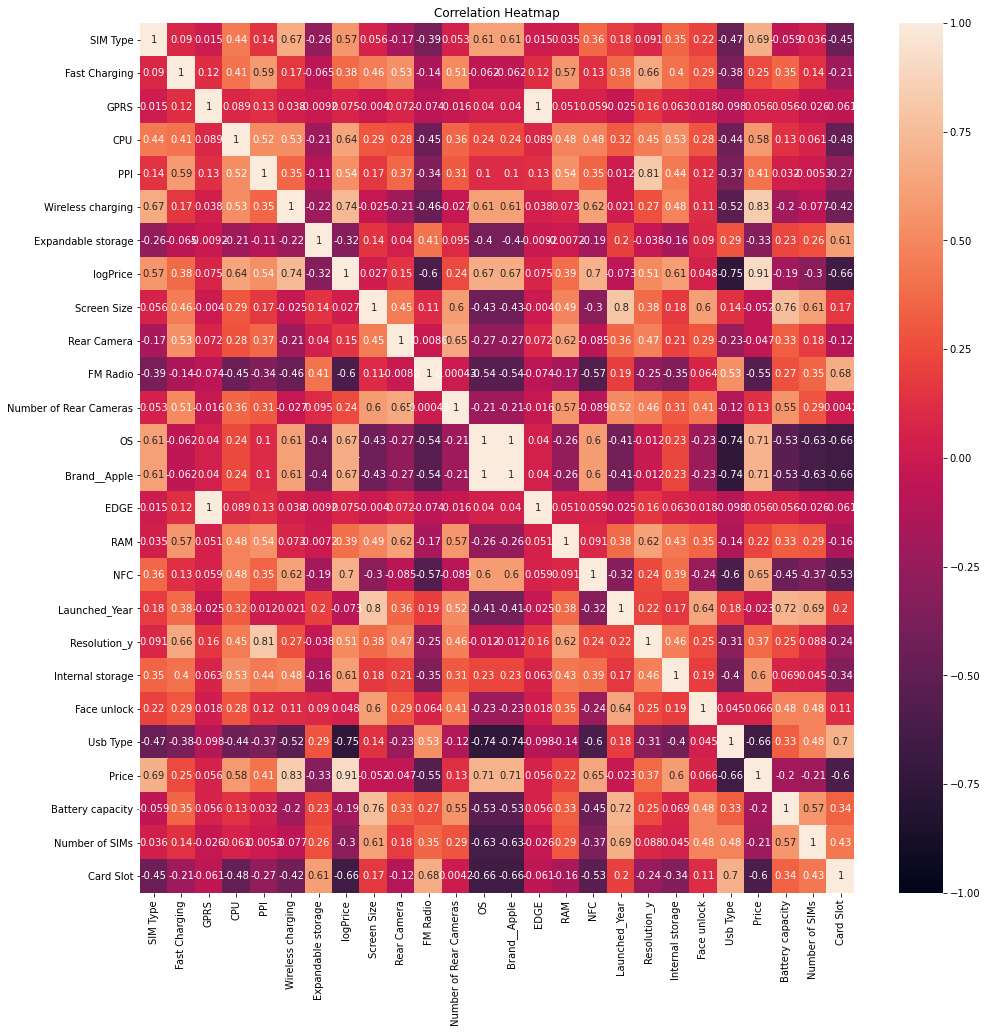

In [12]:
correlated_data = data[correlated_columns]
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(correlated_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

In [13]:
to_remove = ['OS', 'EDGE']
data = data.drop(to_remove,axis=1)
boolean_columns.remove('EDGE')
categorical_columns.remove('OS')
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 2 features
Updated number of features = 64


## Регресија

In [14]:
X = data.drop(['Price','logPrice'], axis=1)
y = data['logPrice']

In [15]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

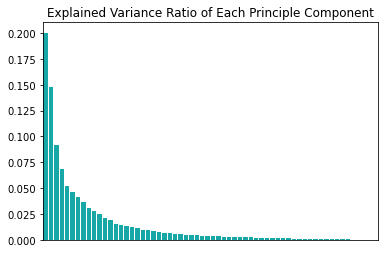

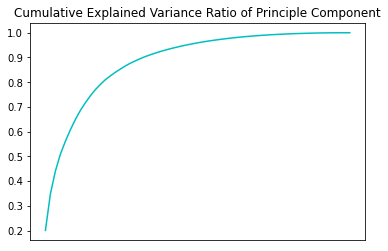

Cumulative variance of 80% reached at component 12


In [16]:
pca = PCA(n_components = None)
pca.fit(X)
X_pca = pca.transform(X)

plt.figure()
sns.barplot(x=np.arange(X.shape[1]),y=pca.explained_variance_ratio_, color="c")
plt.xticks([])
plt.title("Explained Variance Ratio of Each Principle Component")
plt.show()

plt.figure()
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(X.shape[1]),cumulative_explained_variance, color="c")
plt.xticks([])
plt.title("Cumulative Explained Variance Ratio of Principle Component")
plt.show()
res = list(map(lambda i: i> 0.8, cumulative_explained_variance)).index(True) 
print("Cumulative variance of 80% reached at component", res)

In [19]:
pca = PCA(n_components = res)
pca.fit(X)
X_pca = pca.transform(X)

In [20]:
reg = LinearRegression()
scores = cross_val_score(reg, X_pca, y, cv=10)
print(scores.mean())
print(scores.std())

0.7447988651539685
0.14291256714483597
